# Node centralities

Which are the most important/central nodes in a network?

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this notebook, we will work with the co-authorship network between network scientists. Recall that in a co-authorship network, a node represents a scientist, and an edge represent co-authoring relationship.

It was downloaded at http://www-personal.umich.edu/~mejn/netdata/netscience.zip. 

The `netscience.gml` file stores the network. It's just a text file.

The first few lines of the data:

In [2]:
! head -20 ../../../datasets/s4/netscience.gml

Creator "Mark Newman on Sat Jul 22 06:24:59 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "ABRAMSON, G"
  ]
  node
  [
    id 1
    label "KUPERMAN, M"
  ]
  node
  [
    id 2
    label "ACEBRON, J"
  ]
  node


After listing nodes, then list edges:

The command is to print the lines from 7940 to 7962:

In [3]:
! awk 'FNR>=7940 && FNR<=7962' ../../../datasets/s4/netscience.gml

  node
  [
    id 1587
    label "ZHU, J"
  ]
  node
  [
    id 1588
    label "ZIMMERMANN, M"
  ]
  edge
  [
    source 1
    target 0
    value 2.5
  ]
  edge
  [
    source 3
    target 2
    value 0.25
  ]
  edge


Load the network:

In [4]:
netsci_coauthor_net = nx.read_gml('../../../datasets/s4/netscience.gml')

In [5]:
netsci_coauthor_net.number_of_nodes()

1589

In [6]:
netsci_coauthor_net.number_of_edges()

2742

Before analyzing a network, it's worth to check whether the network is connected:

In [7]:
nx.number_connected_components(netsci_coauthor_net)

396

We will analyze the largest connected component subgraph of the network:

In [8]:
netsci_lcc = max(nx.connected_components(netsci_coauthor_net), key=len)

In [9]:
len(netsci_lcc) # which has 379 nodes

379

To get the subgraph of the LCC:

In [10]:
netsci_lcc_net = netsci_coauthor_net.subgraph(netsci_lcc)

In [11]:
netsci_lcc_net.number_of_nodes()

379

In [12]:
netsci_lcc_net.number_of_edges()

914

We will work with the `netsci_lcc_net` network.

## Degree centrality

It's the degree of a node. It has been widely used in science of science. For example, the number of citations of a paper, a metric that has been widely used to measure its impact, is simply its **in-degree** in a paper citation network.

We often normalize the degree by the maximum possible number of nodes one node can connect to, which is $N-1$, $N$ is the number of nodes in the network.

$$\text{degree centrality} = \frac{\text{degree}}{N-1}$$

For example, consider a star graph:

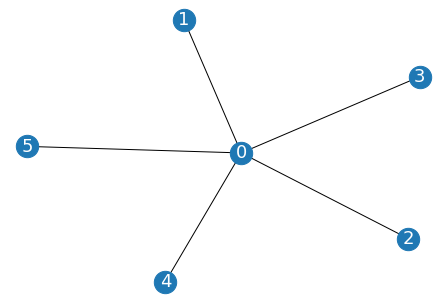

In [13]:
star = nx.star_graph(5)
nx.draw(star,
        with_labels=True,
        node_size=500,
        font_color='white',
        font_size=18,
       )

Node 0 connects to every other nodes, so its degree is $\frac{5}{6-1} = 1$. 

We can verify this:

In [14]:
star_degree = nx.degree_centrality(star)

In [15]:
star_degree

{0: 1.0, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2, 5: 0.2}

Let's calculate the degree centrality of the network science co-authorship network:

In [16]:
netsci_degree = nx.degree_centrality(netsci_lcc_net)

In [17]:
netsci_degree['NEWMAN, M']

0.07142857142857142

Can you verify the rersult is right?

In [58]:
# TODO

0.07142857142857142

How about directed networks? We can calculate [in-degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.in_degree_centrality.html#networkx.algorithms.centrality.in_degree_centrality) and [out-degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.out_degree_centrality.html#networkx.algorithms.centrality.out_degree_centrality)

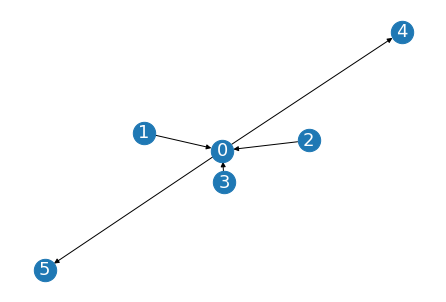

In [18]:
di_star = nx.DiGraph()
di_star.add_edges_from([(1,0), (2,0), (3,0), (0,4), (0,5)])
nx.draw(di_star,
        with_labels=True,
        node_size=500,
        font_color='white',
        font_size=18,
       )

In [19]:
nx.in_degree_centrality(di_star)

{1: 0.0, 0: 0.6000000000000001, 2: 0.0, 3: 0.0, 4: 0.2, 5: 0.2}

Calculate using the definition:

In [20]:
di_star.in_degree(0) / (di_star.number_of_nodes() - 1)

0.6

In [21]:
nx.out_degree_centrality(di_star)

{1: 0.2, 0: 0.4, 2: 0.2, 3: 0.2, 4: 0.0, 5: 0.0}

In [22]:
di_star.out_degree(0) / (di_star.number_of_nodes() - 1)

0.4

## Eigenvector centrality (EC)

Degree centrality assumes all neighbors are equal: each neighbor contributes to one unit to the node, and only the number of neighbors matter.

But in many cases, this is not the case. Some neighbors are more important than others.

The idea of eigenvector centrality is that the importance score of a node is the sum of the scores of its neighbors:

$$x_i^{(t)}=\frac{1}{\lambda}\sum_j A_{ji} x_j^{(t-1)}$$

$A$ is the adjacency matrix of the network. In matrix form: it is:

$$x^{(t)} = \frac{1}{\lambda} Ax^{(t-1)}$$.

After some iterations, $x$ will converge, it is the corresponding eigenvector of the largest eigenvalue ($\lambda$).

A node can have a large EC because (1) it has many neighbors; and/or (2) it has important neighbors.

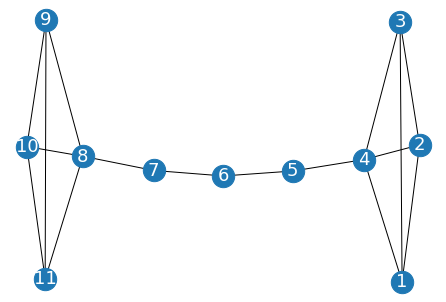

In [23]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
nx.add_path(G, [4, 5, 6, 7, 8])
nx.add_cycle(G, [8, 9, 10, 11])
G.add_edges_from([(8, 10), (9, 11)])
nx.draw(G,
        with_labels=True,
        node_size=500,
        font_color='white',
        font_size=18,
       )

In [24]:
nx.eigenvector_centrality(G)

{1: 0.3342568579623252,
 2: 0.3342568579623252,
 3: 0.3342568579623252,
 4: 0.37084839934563985,
 5: 0.1503702467201933,
 6: 0.09671930851227878,
 7: 0.15037024672019333,
 8: 0.3708483993456399,
 9: 0.3342568579623253,
 10: 0.3342568579623253,
 11: 0.3342568579623253}

In [25]:
G_ec = pd.DataFrame(nx.eigenvector_centrality(G).items(), columns=['node', 'EC'])
G_ec

,node,EC
0,1,0.334257
1,2,0.334257
2,3,0.334257
3,4,0.370848
4,5,0.150370
5,6,0.096719
6,7,0.150370
7,8,0.370848
8,9,0.334257
9,10,0.334257


We will the calculate EC naively. First get the adjacency matrix:

In [26]:
G_adj = pd.DataFrame(nx.adj_matrix(G).todense(), index=list(G), columns=list(G))
G_adj

,1,2,3,4,5,6,7,8,9,10,11
1,0,1,1,1,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0
6,0,0,0,0,1,0,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0
8,0,0,0,0,0,0,1,0,1,1,1
9,0,0,0,0,0,0,0,1,0,1,1
10,0,0,0,0,0,0,0,1,1,0,1


In [27]:
eigen_val = np.linalg.eigvals(G_adj)
eigen_val

array([ 3.1094683 ,  3.0861302 ,  1.48434308,  0.42800673, -1.9149687 ,
       -1.51413693, -0.67884269, -1.        , -1.        , -1.        ,
       -1.        ])

In [28]:
lambda_inv = 1 / eigen_val[0]
lambda_inv

0.3215983902603813

Iterating:

In [29]:
G_ec_iter = np.array([1] * G.number_of_nodes())
for _ in range(100):
    G_ec_iter = G_adj.dot(G_ec_iter) * lambda_inv

In [30]:
G_ec_iter

1     1.051137
2     1.051137
3     1.051137
4     1.166203
5     0.472861
6     0.304143
7     0.472861
8     1.166203
9     1.051137
10    1.051137
11    1.051137
dtype: float64

What we have using NetworkX:

In [31]:
G_ec

,node,EC
0,1,0.334257
1,2,0.334257
2,3,0.334257
3,4,0.370848
4,5,0.150370
5,6,0.096719
6,7,0.150370
7,8,0.370848
8,9,0.334257
9,10,0.334257


Normalize by the maximum value:

In [32]:
G_ec.EC / G_ec.EC.max()

0     0.901330
1     0.901330
2     0.901330
3     1.000000
4     0.405476
5     0.260806
6     0.405476
7     1.000000
8     0.901330
9     0.901330
10    0.901330
Name: EC, dtype: float64

In [33]:
G_ec_iter / G_ec_iter.max()

1     0.901333
2     0.901333
3     0.901333
4     1.000000
5     0.405470
6     0.260797
7     0.405470
8     1.000000
9     0.901333
10    0.901333
11    0.901333
dtype: float64

They are the same.

Get EC for the network science coauthorship network:

In [34]:
netsci_eigen = nx.eigenvector_centrality(netsci_lcc_net)

In [35]:
netsci_eigen['NEWMAN, M']

0.011510592248595436

Does this take edge weight into consideration? How can we achieve this? Read the document [here](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). 

Hint: The weight of an edge is indicated by the "value" property:

In [36]:
netsci_lcc_net['NEWMAN, M']['HOLME, P']

{'value': 0.5}

In [36]:
netsci_eigen_wei = # TODO 

In [37]:
netsci_eigen_wei['NEWMAN, M']

0.0042269025130087234

## PageRank centrality

- Node $j$ is very important; it has a large EC;
- Node $j$ points to many many nodes, which makes all those nodes also important, by the metric of EC;
- But the "endorsement" from $j$ to one particular node, $i$, should be diluted because $i$ is just one of the many nodes thatt $j$ endorses. Thus we need to consider the out-degree of $j$:
$$x_i^{(t)}=\sum_j A_{ji} \frac{x_j^{(t-1)}}{k_j^{out}},$$

$k_j^{out}$ is the out-degree of node $j$.

- One problem is that nodes with any out-going links will only collect endorsement without giving out.
$$x_i^{(t)}=\alpha \sum_j A_{ji} \frac{x_j^{(t-1)}}{k_j^{out}} + (1-\alpha)$$

$\alpha$ is the damping factor, often set to 0.85.

In [37]:
netsci_pagerank = nx.pagerank(netsci_lcc_net)

In [38]:
netsci_pagerank['NEWMAN, M']

0.01616158887499995

## Closeness centrality

Another set of centralities is path-based ones. 

The closeness centrality of a node $i$ measures how close on average it is to other nodes in a network. It is the inverse of average distance to other nodes, $L_i$:

$$\text{closeness} = \frac{1}{L_i}$$

Average distance is: 

$$L_i = \frac{\sum_{j \neq i} d(i,j)}{N-1}$$

$d(i,j)$ is the distance from $i$ to $j$.

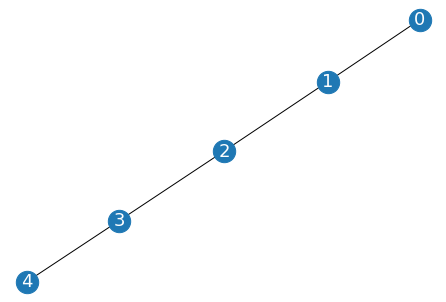

In [39]:
path_net = nx.path_graph(5)
nx.draw(path_net,
        with_labels=True,
        node_size=500,
        font_color='white',
        font_size=18,
       )

What's the distances from 0 to other nodes?

In [40]:
nx.single_source_shortest_path_length(path_net, 0)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

The average distances from node 0 to other nodes is $\frac{1+2+3+4}{4} = 2.5$, and the closeness centrality is $\frac{1}{2.5} = 0.4$

In [41]:
nx.closeness_centrality(path_net)

{0: 0.4,
 1: 0.5714285714285714,
 2: 0.6666666666666666,
 3: 0.5714285714285714,
 4: 0.4}

In [42]:
netsci_close = nx.closeness_centrality(netsci_lcc_net)

In [43]:
netsci_close['NEWMAN, M']

0.25661914460285135

List of centralities provided by NetworkX: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

## Incorporating centrality information into network visualization

We will incorporate the centrality information into the network visualization. Before doing anything, just draw the network:

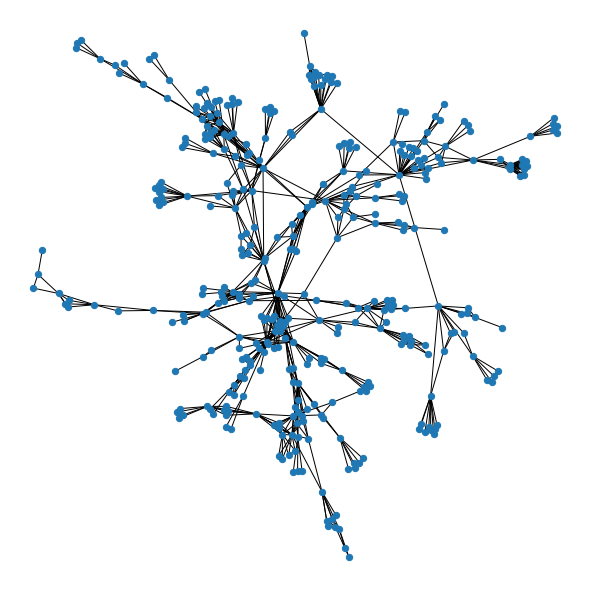

In [44]:
plt.figure(figsize=(8,8)) # put it on a large canvas
nx.draw(netsci_lcc_net,
#         with_labels=True, # we won't show node labels
        node_size=40,
#         font_color='white',
#         font_size=16,
       )

Now we can change the size of a node based on its centrality measures:

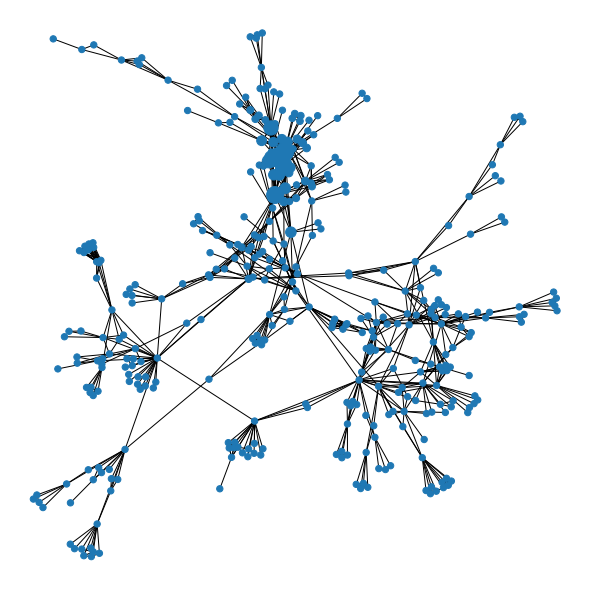

In [45]:
plt.figure(figsize=(8,8))
nx.draw(netsci_lcc_net, 
        with_labels=False, 
        node_size=[max(800*netsci_eigen[n], 40) for n in list(netsci_lcc_net)], # based on Eigenvector
       )

You can play with other types centralities and change the function to map centrality to node size. In the example above, the function is $\max(800x, 40)$.

In the paper [''Finding scientific gems with Google’s PageRank algorithm''](https://www.sciencedirect.com/science/article/pii/S1751157706000034), the authors found that for some physics papers, although their in-degrees (citation counts) are not large, they have very high PageRank centralities. They called those papers "scientific gems".

Can you also find "gems" in a field you are interested in, by constructing a paper citation network and then computing in-degree and PageRank centralities? We have provided the MAG dataset.